# Algorithms

## Main Plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_sizes_to_algorithms(algorithms):
    ans = []
    for alg in algorithms:
        ans.append((alg, 25000))
        ans.append((alg, 50000))
        ans.append((alg, 100000))
    return ans

# Assuming your dataset is stored in a CSV file called "data.csv"
data = pd.read_csv("../results/algorithms_clean.csv")

algorithms = [
    "bubblesort",
    "cyclesort",
    "heapsort",
    "insertionsort",
    "mergesort",
    "oddevensort",
    "quicksort",
    "selectionsort"
]

# Filter the dataset for each algorithm and size combination
algorithm_sizes = add_sizes_to_algorithms(algorithms)
    # Add more algorithm and size combinations as needed

# Create subplots for each algorithm and size combination
num_plots = len(algorithm_sizes)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6 * num_plots))

# Iterate over the algorithm and size combinations
for i, (algorithm, size) in enumerate(algorithm_sizes):
    # Filter the data for the current algorithm and size
    filtered_data = data[(data["Algorithm"] == algorithm) & (data["Size"] == size)]

    # Pivot the filtered data to create a multi-index dataframe
    pivot_data = filtered_data.pivot_table(
        index=["Language", "Package"], values="Time(sec)", fill_value=0
    )

    # Reset the index to flatten the multi-index dataframe
    flat_data = pivot_data.reset_index()

    # Plot the relation between language, package, and time using a scatter plot
    ax = axes[i]
    sns.scatterplot(
        data=flat_data,
        x="Package",
        y="Time(sec)",
        hue="Language",
        palette="Set1",
        ax=ax,
    )

    # Set the title for the current subplot
    ax.set_title(f"{algorithm} - Size {size}")

    # Set the x-axis label
    ax.set_xlabel("Package")

    # Set the y-axis label
    ax.set_ylabel("Time (sec)")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Comparing Algorithms

### By Time

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


f = open('../results/algorithms_clean.csv')
c = csv.DictReader(f, delimiter=',')

df = pd.DataFrame(c)
df = df.astype({'Time(sec)': 'float32'})
grouped = df.groupby('Algorithm')
for alg_name, group in grouped:
    df_pivot = pd.pivot_table(
        group, 
        values='Time(sec)', 
        index='Size', 
        columns='Language', 
        aggfunc='mean'
    )
    df_pivot.plot.bar(title=alg_name)
    plt.xlabel('Input Size')
    plt.ylabel('Time (sec)')
    plt.show()

### By Energy Consumption

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


f = open('../results/algorithms_clean.csv')
c = csv.DictReader(f, delimiter=',')

df = pd.DataFrame(c)
df = df.astype({'Package': 'float32'})
grouped = df.groupby('Algorithm')
for alg_name, group in grouped:
    df_pivot = pd.pivot_table(
        group, 
        values='Package', 
        index='Size', 
        columns='Language', 
        aggfunc='mean'
    )
    df_pivot.plot.bar(title=alg_name)
    plt.xlabel('Input Size')
    plt.ylabel('Package')
    plt.show()

### By Energy and Time

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('../results/algorithms_averages.csv')

# Group the data by algorithm and size
grouped_data = data.groupby(['Algorithm', 'Size'])

# Iterate over each group and generate a separate plot
for (algorithm, size), group in grouped_data:
    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()  # Create a secondary y-axis

    # Plot the bars for the 'Package' values
    sns.barplot(x='Language', y='Package', data=group, ax=ax1)

    # Plot the line for the 'Time' values
    sns.lineplot(x='Language', y='Time(sec)', data=group, ax=ax2)

    # Set labels and title
    ax1.set_xlabel('Language')
    ax1.set_ylabel('Energy (Joules)')
    ax2.set_ylabel('Time (sec)')
    plt.title(f'{algorithm} - Size: {size}')

    # Show the plot
    plt.show()


### By Energy and RAM peak usage

In [ ]:
# TODO

## In Languages

### By Time

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from typing import Any

f = open('../results/algorithms_clean.csv')
c = csv.DictReader(f, delimiter=',')

joined_by_lang: dict[str, list[Any]] = {}
for trace in c:
    lang = trace['Language']
    if lang in joined_by_lang.keys():
        joined_by_lang[lang].append(trace)
    else: 
        joined_by_lang[lang] = [trace]

for (lang_name, lang_traces) in joined_by_lang.items():
    df = pd.DataFrame(lang_traces)
    df = df.astype({'Time(sec)': 'float32'})
    df_time = df.groupby('Algorithm')['Time(sec)'].mean()
    df_time.plot(kind='bar', title=lang_name)
    plt.xlabel('Algorithm')
    plt.ylabel('Time (sec)')
    plt.show()

### By Energy Consumption

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from typing import Any

f = open('../results/algorithms_clean.csv')
c = csv.DictReader(f, delimiter=',')

joined_by_lang: dict[str, list[Any]] = {}
for trace in c:
    lang = trace['Language']
    if lang in joined_by_lang.keys():
        joined_by_lang[lang].append(trace)
    else: 
        joined_by_lang[lang] = [trace]

for (lang_name, lang_traces) in joined_by_lang.items():
    df = pd.DataFrame(lang_traces)
    df = df.astype({'Package': 'float32'})
    df_time = df.groupby('Algorithm')['Package'].mean()
    df_time.plot(kind='bar', title=lang_name)
    plt.xlabel('Algorithm')
    plt.ylabel('Package')
    plt.show()

### By Energy and Time per Algorithm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Read the dataset
data = pd.read_csv('../results/algorithms_averages.csv')

# Group the data by language and size
grouped_data = data.groupby(['Language', 'Size'])

# Iterate over each group and generate a separate plot
for (language, size), group in grouped_data:
    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()  # Create a secondary y-axis

    # Plot the bars for the 'Package' values
    sns.barplot(x='Algorithm', y='Package', data=group, ax=ax1)
    ax1.set_xticklabels([])  # Remove the x-axis labels

    # Plot the line for the 'Time' values
    sns.lineplot(x='Algorithm', y='Time(sec)', data=group, ax=ax2)
    ax2_lines = ax2.get_lines()  # Get the lines from the secondary y-axis
    ax2_lines[0].set_label('Time')  # Set the label of the line

    # Create colored patches and combine with algorithm labels and time label
    algorithm_labels = group['Algorithm'].unique()
    algorithm_patches = [mpatches.Patch(color=sns.color_palette()[i], label=label) for i, label in enumerate(algorithm_labels)]
    plt.legend(handles=[*algorithm_patches, ax2_lines[0]], loc='upper right')

    # Set labels and title
    ax1.set_xlabel('Algorithm')
    ax1.set_ylabel('Energy (Joules)')
    ax2.set_ylabel('Time (sec)')
    plt.title(f'{language} - Size: {size}')

    # Show the plot
    plt.show()


### By Energy and Time per Size

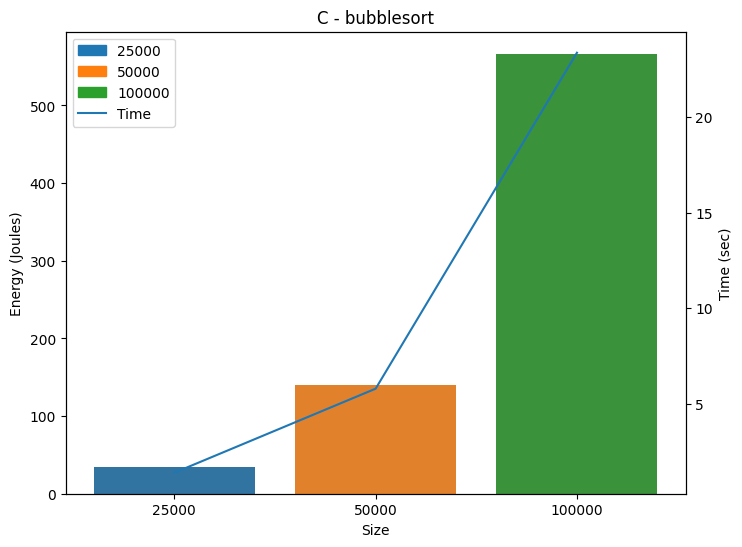

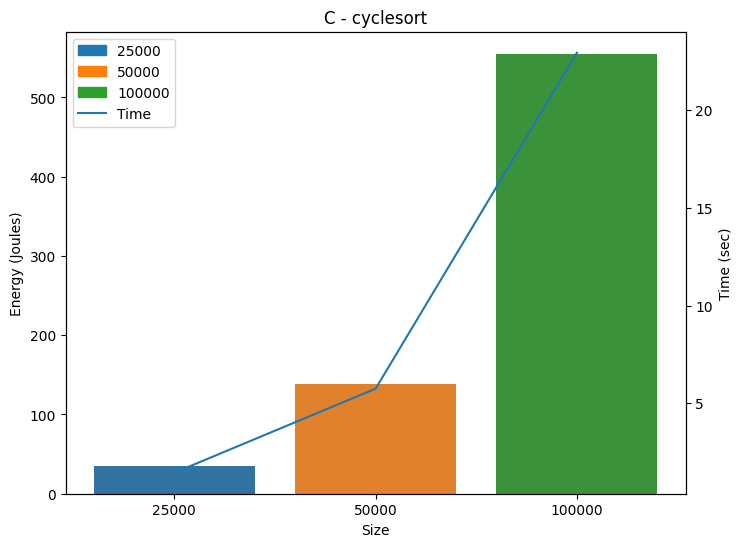

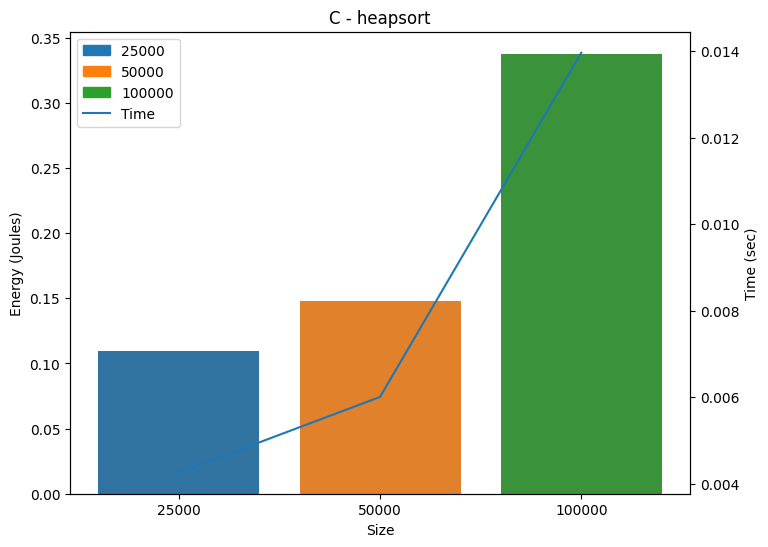

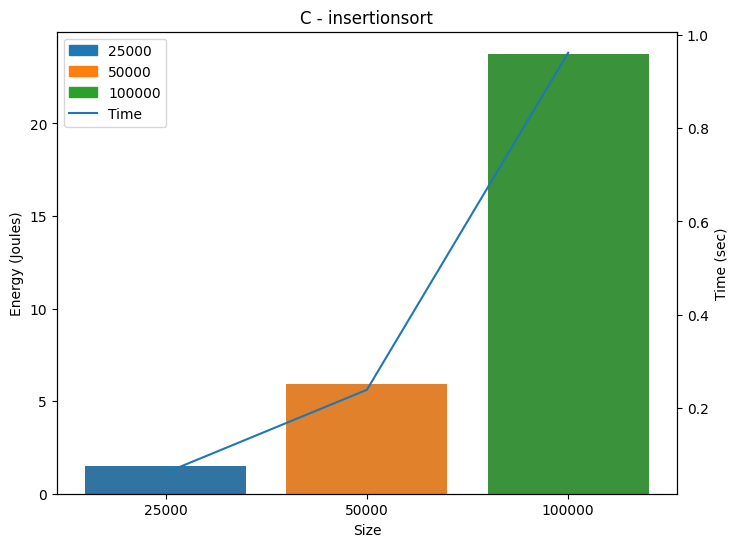

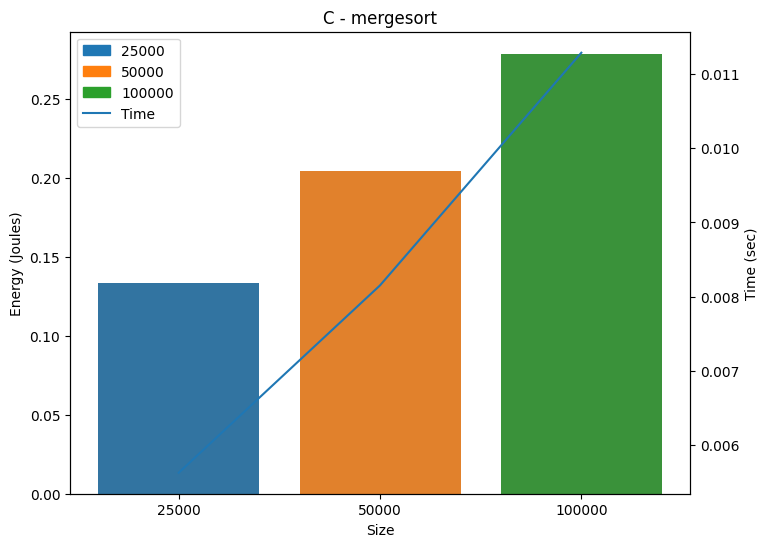

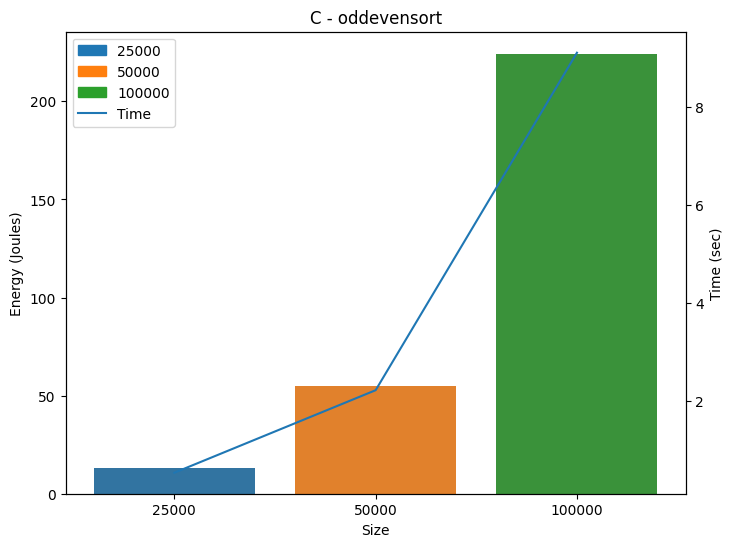

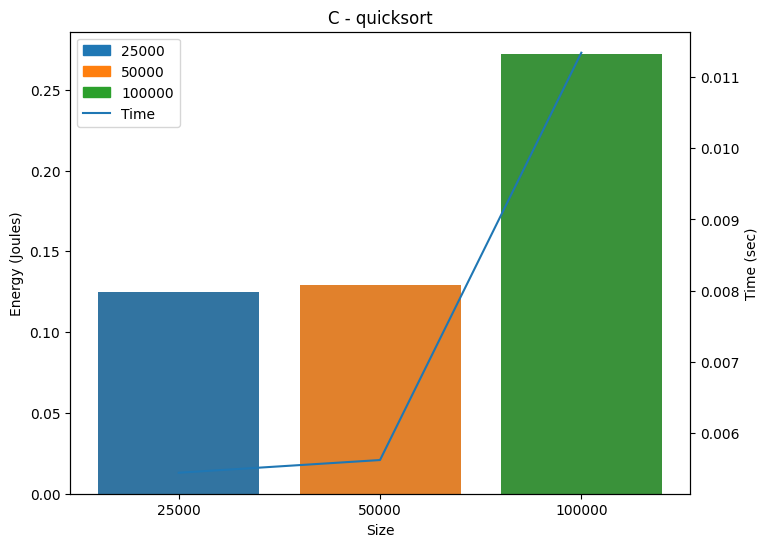

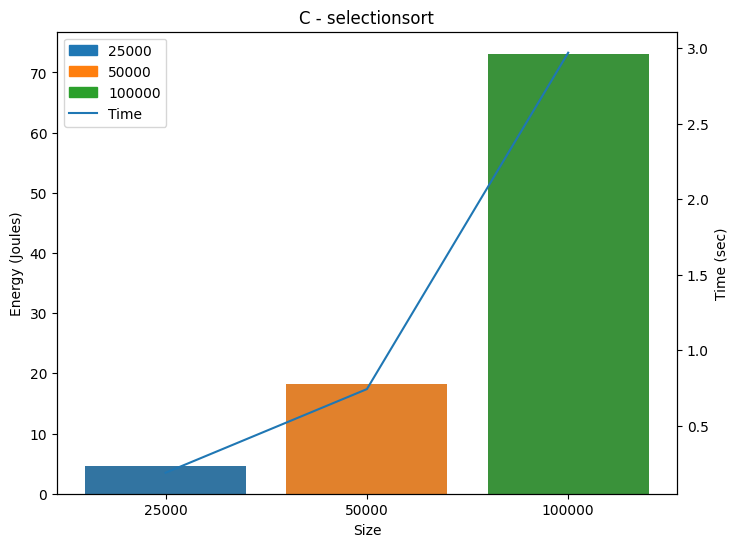

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Read the dataset
data = pd.read_csv('../results/algorithms_averages.csv')
# Group the data by language and algorithm
grouped_data = data.groupby(['Language', 'Algorithm'])

# Iterate over each group and generate a separate plot
for (language, algorithm), group in grouped_data:
    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax2 = ax1.twinx()  # Create a secondary y-axis
    group['Size'] = group['Size'].astype('str')
    # Plot the bars for the 'Package' values
    sns.barplot(x='Size', y='Package', data=group, ax=ax1)

    # Plot the line for the 'Time' values
    sns.lineplot(x='Size', y='Time(sec)', data=group, ax=ax2)
    ax2_lines = ax2.get_lines()  # Get the lines from the secondary y-axis
    ax2_lines[0].set_label('Time')  # Set the label of the line

    # Create colored patches and combine with algorithm labels and time label
    algorithm_labels = group['Size'].unique()
    algorithm_patches = [mpatches.Patch(color=sns.color_palette()[i], label=label) for i, label in enumerate(algorithm_labels)]
    plt.legend(handles=[*algorithm_patches, ax2_lines[0]], loc='upper left')

    # Set labels and title
    ax1.set_xlabel('Size')
    ax1.set_ylabel('Energy (Joules)')
    ax2.set_ylabel('Time (sec)')
    plt.title(f'{language} - {algorithm}')

    # Show the plot
    plt.show()


# Compile

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_sizes_to_algorithms(algorithms):
    ans = []
    for alg in algorithms:
        ans.append((alg, 25000))
        ans.append((alg, 50000))
        ans.append((alg, 100000))
    return ans

data = pd.read_csv("../results/compile_clean.csv")

algorithms = [
    "bubblesort",
    "cyclesort",
    "heapsort",
    "insertionsort",
    "mergesort",
    "oddevensort",
    "quicksort",
    "selectionsort"
]

# Filter the dataset for each algorithm and size combination
algorithm_sizes = add_sizes_to_algorithms(algorithms)
    # Add more algorithm and size combinations as needed

# Create subplots for each algorithm and size combination
num_plots = len(algorithm_sizes)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6 * num_plots))

# Iterate over the algorithm and size combinations
for i, (algorithm, size) in enumerate(algorithm_sizes):
    # Filter the data for the current algorithm and size
    filtered_data = data[(data["Algorithm"] == algorithm) & (data["Size"] == size)]

    # Pivot the filtered data to create a multi-index dataframe
    pivot_data = filtered_data.pivot_table(
        index=["Language", "Package"], values="Time(sec)", fill_value=0
    )

    # Reset the index to flatten the multi-index dataframe
    flat_data = pivot_data.reset_index()

    # Plot the relation between language, package, and time using a scatter plot
    ax = axes[i]
    sns.scatterplot(
        data=flat_data,
        x="Package",
        y="Time(sec)",
        hue="Language",
        palette="Set1",
        ax=ax,
    )

    # Set the title for the current subplot
    ax.set_title(f"{algorithm} - Size {size}")

    # Set the x-axis label
    ax.set_xlabel("Package")

    # Set the y-axis label
    ax.set_ylabel("Time (sec)")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
